<a id="top"></a>
# Exploring UV Extinction Curves
***
## Learning Goals

By the end of this tutorial, you will be able to:

- Perform data queries on the MAST archives using astroquery
- Narrow down query results to the desired spectrum
- Clean, analyze, and plot spectral data
- Fit extinction curves to a parameterized model

## Introduction

In this tutorial, you will learn how to download IUE data using the [MAST Archive API, astroquery](https://astroquery.readthedocs.io/en/latest/mast/mast.html). We'll obtain the spectra of two stars, one reddened and one not. We will use these spectra to construct and plot UV extinction curves. An extinction curve demonstrates the wavelength dependence of dust extinction. It compares the dust-free Spectral Energy Distribution (SED) of a star to the observed SED. Normally these curves are created by plotting $k(\lambda-V)$ versus $1/\lambda$, with $\lambda$ being the wavelength (see 'Useful Equations' below).

Extinction is relevant in a diverse range of scenarios. Sometimes, dust is found very near the observed object, like in stars with disks or proto-stellar clouds. However, the target does not need to be intrinsically "dusty"; dust in a galaxy that is light-years from a target star might still block the line-of-sight view and impact the observation.

In this lesson, our data comes from the [International Ultraviolet Explorer](https://archive.stsci.edu/iue/) (IUE). IUE performed spectrophotometry in the wavelength range from 1150 Å to 3200 Å. MAST hosts these observations, which include more than 100,000 spectra.


**Defining some terms**:

- **Color index**: difference between magnitude of a star in two different passbands, typically B and V. Symbol: $(B-V)$. 
- **Extinction**: absoption and scattering of light by dust and gas between an object and the observer. It is a measure of the interstellar reddening quantified by the difference between the magnitude of the band when observed through dust versus a dust-free environment. Symbol: $A(\lambda)$.  
- **Magellanic Clouds**: Irregular dwarf galaxies that orbit the Milky Way galaxy and are located in the southern celestial hemisphere. Two distinct groups can be differentiated: the Large Magellanic Cloud (LMC) and the Small Magellanic Cloud (SMC).
- **Spectral type**: stellar classification from hotter (O stars) to cooler (M stars). Temperature defines a star's "color" and surface brightness.


**The "extinction equation" we'll use to create our plots:**
- $k(\lambda-V) = \frac{m(\lambda-V)-m(\lambda-V)_o}{(B-V)-(B-V)_o} = \frac{A(\lambda)-A(V)}{A(B)-A(V)}$ 

_**Note**: the $x_o$ terms refer to the star that is nearly unaffected by dust, i.e. $(B-V)$ corresponds to the observed color index and $(B-V)_o$ to the color index if there were no extinction due to dust. The stars should have the same spectral type in order to perform this comparison._

<!-- - The [Fitzpatrick and Massa (1990) parametrization](https://ui.adsabs.harvard.edu/abs/1990ApJS...72..163F/abstract): this will be the parametrization that will be followed in this tutorial for extinction curves. This parametrization is a combination of three elements; a linear "background term"; a Lorentsian-like "Drude" profile for the 2175 Å bump, $D(x; \gamma, x_o)$; finally, a far-UV curvature term, $F(x)$. The $x$ in the equation corresponds to $x = \lambda^{-1}$. 

$$\begin{equation}
 k(x-V) = c_1 + c_2x + c_3D(x; \gamma, x_o)+c_4F(x)
\end{equation}$$

$$\begin{equation}
 D(x; \gamma, x_o) = \frac{x^2}{(x^2-x_o^2)^2+x^2\gamma^2}
\end{equation}$$

$$\begin{equation}
 F(x) = \begin{cases}
    0.5392(x-5.9)^2+0.05644(x-5.9)^3, & \text{for $x \geq 5.9 \mu m^{-1}$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{equation}$$ -->
    
## Table of Contents
* [Imports](#Imports)
* [Searching by Target Name and Downloading Spectra](#Searching-the-MAST-archive-by-target-name-and-downloading-spectra)
* [Exploring the downloaded data files](#Exploring-the-downloaded-data-files)
* [Data access and manipulation](#Data-access-and-manipulation)
* [Saving values into your local computer](#Saving-values-into-your-local-computer)
* [Exercises](#Exercises)
* [Additional Resources](#Additional-Resources)

## Imports 

The first step will be to import the libraries we will be using throughout this tutorial: 

- `Observations` from [astroquery.mast](https://astroquery.readthedocs.io/en/latest/mast/mast.html) to query the MAST Archive.
- `fits` from _astropy.io_ for accessing FITS files
- `Simbad` from [astroquery.simbad](https://astroquery.readthedocs.io/en/latest/simbad/simbad.html) to query the SIMBAD database.
- `numpy` for array manipulations
- `matplotlib` for plotting

In [1]:
from astroquery.mast import Observations
from astropy.io import fits
from astroquery.simbad import Simbad

import numpy as np

import matplotlib.pyplot as plt

_**Warning**: If you have not installed the astroquery package on your computer, you will need to. Information about astroquery can be found [on the readthedocs](https://astroquery.readthedocs.io/en/latest/)._

## Background and Targets

The first step is to find the data files we want to use. We will using the `Observations` Class from `astroquery.mast` both to search for and download UV data from the IUE.

We'll be targeting two stars: AzV 456 and AzV 70. This former is reddened by dust, while the latter is not. This particular example is from [Gordon et al. (2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...594..279G/abstract), but you can use any pair of reddened and unreddened stars with the same spectral type and luminosity class.

## Searching and Downloading in astroquery.mast

We'll make our targets flexible here by creating a "dusty" and "no dust" option. If you want to explore other stars, change the targets below!

In [2]:
target_dusty = "Azv456"
target_nodust = "Azv70"

The `query_criteria` function allows you to filter by mission, as well as object name. For a full list of fields you can query, as well as their associated metadata names, see the [CAOM fields description](https://mast.stsci.edu/api/v0/_c_a_o_mfields.html) page. For this search, we'll filter for IUE data taken on the "no dust" target.

**Note: We'll use a radius of zero to exactly match our target; depending on your particular query, this may result in some missing observations. Use with caution!**

In [3]:
# We use a radius of zero to find exact matches
obs_table_nodust = Observations.query_criteria(obs_collection="IUE",
                                               objectname=target_nodust,
                                               radius="0m")
len(obs_table_nodust)

2

In [4]:
# Display the matching observations, if you want
obs_table_nodust

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,objID1,distance
str7,str3,str1,str3,str1,str8,str2,str5,str1,str8,float64,float64,str8,str11,int64,float64,float64,float64,float64,float64,str67,float64,str5,str1,int64,str57,str74,str64,str6,bool,float64,str6,str6,str6,float64
science,IUE,--,LWP,--,LOW DISP,UV,SK 35,--,lwp12387,12.577660313500019,-72.6341409203,spectrum,Fitzpatrick,2,47157.58737,47157.60403,1438.556,185118000000.0,334760000000.0,Energy Distributions of B Supergiants in the Small Magellanic Cloud,nan,OBJEF,--,--,CIRCLE ICRS 12.5776603135 -72.6341409203 0.00300694444444,http://archive.stsci.edu/browse/previews/iue/mx/lwp/12000/gif/lwp12387.gif,http://archive.stsci.edu/pub/vospectra/iue2/lwp12387mxlo_vo.fits,PUBLIC,--,5885.0,282218,509096,509096,0.0
science,IUE,--,SWP,--,LOW DISP,UV,SK 35,--,swp18830,12.577660313500019,-72.6341409203,spectrum,Walborn,2,45323.68226,45323.70308,1798.573,115059000000.0,197870000000.0,SNC OB Supergiants,nan,OD90B,--,--,CIRCLE ICRS 12.5776603135 -72.6341409203 0.00300694444444,http://archive.stsci.edu/browse/previews/iue/mx/swp/18000/gif/swp18830.gif,http://archive.stsci.edu/pub/vospectra/iue2/swp18830mxlo_vo.fits,PUBLIC,--,5885.0,315988,542866,542866,0.0


There are two matching observations. One covers a short wavelength domain and the other covers the long domain (short and long are relative: both are UV observations). Let's use both so that we'll have a more complete picture of the extinction behavior over different wavelengths.

Let's find the data products associated with these observations. We'll use the `get_products` function to do that.

In [5]:
data_products_nodust = Observations.get_product_list(obs_table_nodust)

In [6]:
# Display the products, if you want
data_products_nodust

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str6,str3,str8,str8,str56,str1,str62,str9,str28,str56,str1,str1,str1,str5,str20,int64,str6,str6,int64,str8
282218,IUE,spectrum,lwp12387,ELBLL,S,mast:IUE/url/pub/iue/data/lwp/12000/lwp12387.elbll.gz,AUXILIARY,--,--,--,--,--,OBJEF,lwp12387.elbll.gz,189118,282218,PUBLIC,2,LOW DISP
282218,IUE,spectrum,lwp12387,LILO,S,mast:IUE/url/pub/iue/data/lwp/12000/lwp12387.lilo.gz,AUXILIARY,--,--,--,--,--,OBJEF,lwp12387.lilo.gz,515822,282218,PUBLIC,2,LOW DISP
282218,IUE,spectrum,lwp12387,MELOL,S,mast:IUE/url/pub/iue/data/lwp/12000/lwp12387.melol.gz,AUXILIARY,--,--,--,--,--,OBJEF,lwp12387.melol.gz,12259,282218,PUBLIC,2,LOW DISP
282218,IUE,spectrum,lwp12387,RAW,S,mast:IUE/url/pub/iue/data/lwp/12000/lwp12387.raw.gz,AUXILIARY,--,--,--,--,--,OBJEF,lwp12387.raw.gz,346749,282218,PUBLIC,2,LOW DISP
282218,IUE,spectrum,lwp12387,RILO,S,mast:IUE/url/pub/iue/data/lwp/12000/lwp12387.rilo.gz,AUXILIARY,--,--,--,--,--,OBJEF,lwp12387.rilo.gz,352139,282218,PUBLIC,2,LOW DISP
282218,IUE,spectrum,lwp12387,SILO,S,mast:IUE/url/pub/iue/data/lwp/12000/lwp12387.silo.gz,AUXILIARY,--,--,--,--,--,OBJEF,lwp12387.silo.gz,88560,282218,PUBLIC,2,LOW DISP
282218,IUE,spectrum,lwp12387,Preview-Full,S,mast:IUE/url/browse/previews/iue/mx/lwp/12000/gif/lwp12387.gif,PREVIEW,--,--,--,--,--,OBJEF,lwp12387.gif,6407,282218,PUBLIC,2,LOW DISP
282218,IUE,spectrum,lwp12387,MXLO,S,mast:IUE/url/pub/iue/data/lwp/12000/lwp12387.mxlo.gz,SCIENCE,Minimum Recommended Products,--,--,--,--,OBJEF,lwp12387.mxlo.gz,18343,282218,PUBLIC,2,LOW DISP
282218,IUE,spectrum,lwp12387,(extracted spectra/vo spectral container/SSAP) fits file,S,mast:IUE/url/pub/vospectra/iue2/lwp12387mxlo_vo.fits,SCIENCE,Minimum Recommended Products,(extracted spectra/vo spectral container/SSAP) fits file,--,--,--,OBJEF,lwp12387mxlo_vo.fits,51840,282218,PUBLIC,2,LOW DISP


This looks good, but a fair number of these results have the `productType` 'AUXILIARY'; they were orginially intended for calibration or engineering purposes. We want only the the products marked 'SCIENCE'; more specifically, we're looking for extracted spectra in `.fits` files. Let's add some filters to match those results.

In [7]:
filtered_products_nodust = Observations.filter_products(data_products_nodust,
                                                        productType='SCIENCE',
                                                        extension='.fits')
len(filtered_products_nodust)

2

In [8]:
# Display the results, if you want
filtered_products_nodust

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str6,str3,str8,str8,str56,str1,str62,str9,str28,str56,str1,str1,str1,str5,str20,int64,str6,str6,int64,str8
282218,IUE,spectrum,lwp12387,(extracted spectra/vo spectral container/SSAP) fits file,S,mast:IUE/url/pub/vospectra/iue2/lwp12387mxlo_vo.fits,SCIENCE,Minimum Recommended Products,(extracted spectra/vo spectral container/SSAP) fits file,--,--,--,OBJEF,lwp12387mxlo_vo.fits,51840,282218,PUBLIC,2,LOW DISP
315988,IUE,spectrum,swp18830,(extracted spectra/vo spectral container/SSAP) fits file,S,mast:IUE/url/pub/vospectra/iue2/swp18830mxlo_vo.fits,SCIENCE,Minimum Recommended Products,(extracted spectra/vo spectral container/SSAP) fits file,--,--,--,OD90B,swp18830mxlo_vo.fits,51840,315988,PUBLIC,2,LOW DISP


Great! All that remains is to download the files. You can do this by passing the entire product table to the `download_products` function.

In [9]:
manifest_nodust = Observations.download_products(filtered_products_nodust)

 [Done]


 [Done]


### Rinse and Repeat for Target Two
Now, let's repeat this process for our second, dusty target. We'll condense the code into one cell for convenience.

In [10]:
obs_table_dusty = Observations.query_criteria(obs_collection="IUE",
                                              objectname=target_dusty,
                                              radius="0m",
                                              proposal_pi="Prevot") # We specify the PI since this search returns more results


data_products_dusty = Observations.get_product_list(obs_table_dusty)

# Note that you can skip the 'filter products' step
# Instead, you can pass the filters directly to 'download_products'
manifest_dusty = Observations.download_products(data_products_dusty,
                                                productType='SCIENCE',
                                                extension=".fits")

 [Done]


 [Done]


## Exploring the Downloaded Data Files

Now, let's explore the FITS files we just downloaded. The filepaths were saved in our `manifest` variable when we used `download_products`.

In [11]:
# Pull the filepaths from the manifests
filenames_dusty = manifest_dusty['Local Path']
filenames_nodust = manifest_nodust['Local Path']

# The first path in the list is for the 'long wavelength' data
lw_dusty = filenames_dusty[0]

# We'll create the other files now, for convenience
sw_dusty = filenames_dusty[1]
lw_nodust = filenames_nodust[0]
sw_nodust = filenames_nodust[1]

# Print the information from the first file only
fits.info(lw_dusty)

Filename: ./mastDownload/IUE/lwr12347/lwr12347mxlo_vo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   ()      
  1  Spectral Container    1 BinTableHDU    141   1R x 4C   [562E, 562E, 562E, 562I]   


- **No. 0 (PRIMARY)**: This HDU contains metadata related to the entire file.
- **No. 1 (Spectral Container)**: This HDU contains the spectral profile of the target as a function of wavelength.

The header of the file contains additional information about the data. 

Let's take a look at some of the columns that are more relevant to us: 

In [12]:
with fits.open(lw_dusty) as hdulist: 
    header_lw_dusty = hdulist[1].header

# Remove to the [9:15] index to see the entire header
print(repr(header_lw_dusty[9:15]))

COMMENT  *** Column names ***                                                   
COMMENT                                                                         
TTYPE1  = 'WAVE    '           /                                                
TTYPE2  = 'FLUX    '           /                                                
TTYPE3  = 'SIGMA   '           /                                                
TTYPE4  = 'QUALITY '           /                                                


This tell us that first column corresponds to the wavelengths, and the second column to the fluxes. We can also see the units:

In [13]:
print(repr(header_lw_dusty[23:28]))

COMMENT   *** Column units ***                                                  
COMMENT                                                                         
TUNIT1  = 'angstrom'           / wavelength unit is Angstrom                    
TUNIT2  = 'erg/cm**2/s/angstrom' / flux unit is ergs/cm2/sec/A                  
TUNIT3  = 'erg/cm**2/s/angstrom' / sigma unit is ergs/cm2/sec/A                 


## Data Access and Validation

The data contained in this fits file can be accessed using `io.fits` and the `.data` attribute. This can be tedious to do more than once, so let's create a helper function to do it for us.

In [14]:
# This helper function will take a filename and return the wavelength/flux data
def extractData(filename):
    # Open the file and read the data
    with fits.open(filename) as hdulist:
        spectrum = hdulist[1].data
        
    # Extract our desired data from the corresponding columns
    wav = spectrum[0][0]   # wavelength, angstrom, A
    flux = spectrum[0][1] # flux, ergs/cm2/sec/A

    return wav, flux

Let's make sure we get a sensible result when we extract the data. We can make a quick plot to see if anything is wrong with the results.

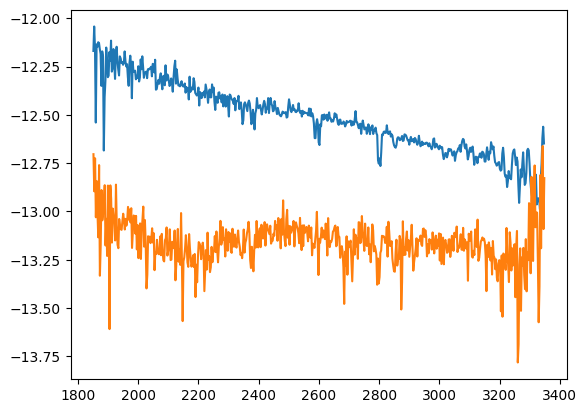

In [15]:
# Let's run our helper function on our data
wav_lw_dusty, flux_lw_dusty = extractData(lw_dusty)
wav_sw_dusty, flux_sw_dusty = extractData(sw_dusty)
wav_lw_nodust, flux_lw_nodust = extractData(lw_nodust)
wav_sw_nodust, flux_sw_nodust = extractData(sw_nodust)

# Let's also make a rough plot of our data, just so we can see what we're working with
plt.plot(wav_lw_nodust, np.log10(flux_lw_nodust))
plt.plot(wav_lw_dusty, np.log10(flux_lw_dusty))

This looks good on inspection, but we should check that both targets have consistent data. We'd like to compare one star to another and our later analysis requires that corresponding datasets have the same number of points.

In [16]:
# Inspect the lengths by eye
print(len(wav_lw_nodust), len(flux_lw_nodust), len(wav_lw_dusty), len(flux_lw_dusty)) # check long wavelength data
print(len(wav_sw_nodust), len(flux_sw_nodust), len(wav_sw_dusty), len(flux_sw_dusty)) # check short

563 563 562 562
495 495 495 495


Whoops! Looks like the the long wavelength data is not consistent. Let's adjust and check again.

In [17]:
# Shorten the lw_nodust data so it matches the dusty data
# This may not work for your targets! Always check your data
wav_lw_nodust = wav_lw_nodust[:len(wav_lw_dusty)]
flux_lw_nodust = flux_lw_nodust[:len(flux_lw_dusty)]
    
print(len(wav_lw_nodust), len(flux_lw_nodust), len(wav_lw_dusty), len(flux_lw_dusty))
print(len(wav_sw_nodust), len(flux_sw_nodust), len(wav_sw_dusty), len(flux_sw_dusty))

562 562 562 562
495 495 495 495


## Data Plotting

After searching for, downloading, and cleaning our data, we're finally ready to display the plot. We'll plot the flux against the inverse wavelength; this is customary for this type of study and follows the example in [Gordon et al. (2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...594..279G/abstract).

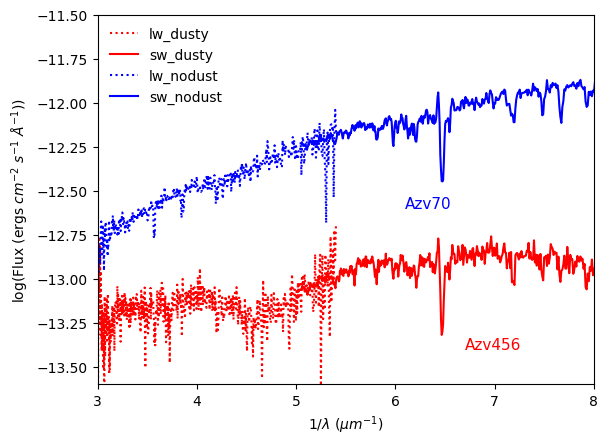

In [18]:
# Create a helper function to plot the data. We want to plot inverse wavelength against log of flux
def Plot(wav, flux, style, lbl):
    plt.plot(10**4/wav, np.log10(flux), style, label=lbl)


# Set up the plot size, labels, units
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel(r'1/$\lambda$ ($\mu m^{-1}$)')
ax.set_ylabel(r'log(Flux (ergs $cm^{-2}$ $s^{-1}$ $\AA^{-1}$))')
ax.set_xlim([3, 8])
ax.set_ylim([-13.6, -11.5])

# Call the helper function four times: for long/short wavelengths of both targets
Plot(wav_lw_dusty, flux_lw_dusty, 'r:', 'lw_dusty')
Plot(wav_sw_dusty, flux_sw_dusty, 'r', 'sw_dusty')
Plot(wav_lw_nodust, flux_lw_nodust, 'b:', 'lw_nodust')
Plot(wav_sw_nodust, flux_sw_nodust, 'b', 'sw_nodust')

# Add some labels to our plot to clarify which spectrum is which
plt.text(6.7, -13.4, target_dusty, fontsize=11, color='r')
plt.text(6.1, -12.6, target_nodust, fontsize=11, color='b')

# Create the legend and show our plot
plt.legend(loc='best', frameon=False)
plt.show()

What a wonderful example of extinction! Both stars have the same spectral features, but we can see a significant dimming of AzV456, especially in the shorter, bluer wavelengths; it is safe to say this star is reddened.

## Extinction Curve

Let's now use the <a href="http://simbad.cds.unistra.fr/simbad/">SIMBAD</a> database to look for the fluxes in the B and V bands for both stars. We can do a simple query using the identifier of both stars. The magnitudes can be found under the 8th subgroup presented below the name of the stars, called 'Fluxes', since SIMBAD can provide you with either the flux or the magnitude of the star in those bands.


In [19]:
# Request the B and V magnitudes
Simbad.add_votable_fields('flux(B)', 'flux(V)')

# Query for dusty star, in our case AvZ 456
table_dusty = Simbad.query_object(target_dusty)

/tmp/ipykernel_1929/617565110.py:2: DeprecationWarning: The notation 'flux(B)' is deprecated since 0.4.8 in favor of 'B'. You will see the column appearing with its new name in the output. See section on filters in https://astroquery.readthedocs.io/en/latest/simbad/simbad_evolution.html to see the new ways to interact with SIMBAD's fluxes.
  Simbad.add_votable_fields('flux(B)', 'flux(V)')
/tmp/ipykernel_1929/617565110.py:2: DeprecationWarning: The notation 'flux(V)' is deprecated since 0.4.8 in favor of 'V'. You will see the column appearing with its new name in the output. See section on filters in https://astroquery.readthedocs.io/en/latest/simbad/simbad_evolution.html to see the new ways to interact with SIMBAD's fluxes.
  Simbad.add_votable_fields('flux(B)', 'flux(V)')


In [20]:
# Examine the data, if you want
table_dusty

main_id,ra,dec,coo_err_maj,coo_err_min,coo_err_angle,coo_wavelength,coo_bibcode,B,V,matched_id
,deg,deg,mas,mas,deg,,,,,
object,float64,float64,float32,float32,int16,str1,object,float64,float64,object
SK 143,17.732319696199998,-72.71561752612,0.4389,0.4246,90,O,2020yCat.1350....0G,12.979999542236328,12.890000343322754,AzV 456


Great. Let's get the data for AzV70 as well.

In [21]:
table_nodust = Simbad.query_object(target_nodust)

From these values we can directly calculate $E(B-V) = (B-V)-(B-V)_o$. We can do this since AvZ 70 is essentially an unreddened version of AvZ 456.

In [22]:
# Extract these values from the table
V_dusty = table_dusty['V'][0]
B_dusty = table_dusty['B'][0]

V_nodust = table_nodust['V'][0]
B_nodust = table_nodust['B'][0]

# Plug into the formula
EBV = (B_dusty-V_dusty)-(B_nodust-V_nodust)
print(f"The value of E(B-V) is equal to {EBV:.3f}")

The value of E(B-V) is equal to 1.530


Now we can fully plot the extinction curve! Recall the equation from the start of this Notebook.

$$k(\lambda-V) = \frac{m(\lambda-V)-m(\lambda-V)_o}{(B-V)-(B-V)_o} = \frac{A(\lambda)-A(V)}{E(B-V)} $$

Let's expand this out and be explicit: which values do we need to use to calculate extinction?

$$\frac{A(\lambda)-A(V)}{E(B-V)}=\frac{log(V\_ratio)-log(flux\_ratio)}{E(B-V)} = \frac{log (V\_ratio \div flux\_ratio)}{E(B-V)}$$

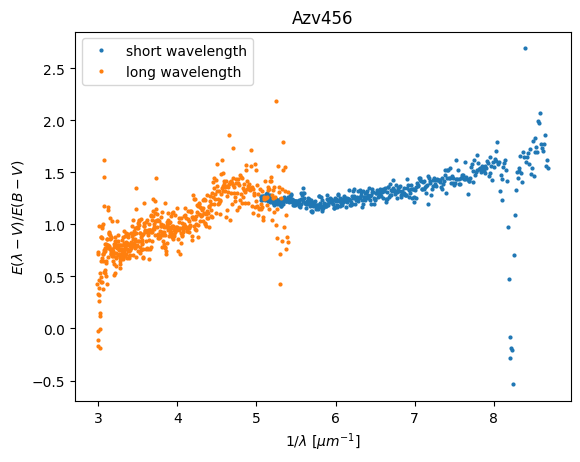

In [23]:
# Another helper function to create our plots, and save the output data for further analysis
def Extinction(wav, flux1, flux2):
    V_rat = V_dusty/V_nodust
    flux_rat = flux1/flux2
    # Calcuating extinction from the formula 
    ext = np.log(V_rat/flux_rat)/EBV
    inv_wav = 10**4/wav
    plt.plot(inv_wav, ext, 'o', markersize=2)
    return inv_wav, ext 


# Create the figure, then use the helper function to create the plots and save the data
plt.figure()
s_inv_wav, s_ext = Extinction(wav_sw_dusty, flux_sw_dusty, flux_sw_nodust)
l_inv_wav, l_ext = Extinction(wav_lw_dusty, flux_lw_dusty, flux_lw_nodust)

# Add a title, axes labels, and a legend
plt.legend(['short wavelength', 'long wavelength'])
plt.xlabel(r'$1/\lambda$ $[\mu m^{-1}]$')
plt.ylabel(r'$E(\lambda-V)/E(B-V)$')
plt.title(target_dusty)
plt.show()

The values at the edge of the detectors don't look quite right. Particularly the right edge of the short wavelength; would we really expect the reddened star to be brighter in the short wavelengths region Let's excise the data from the edges and try again.

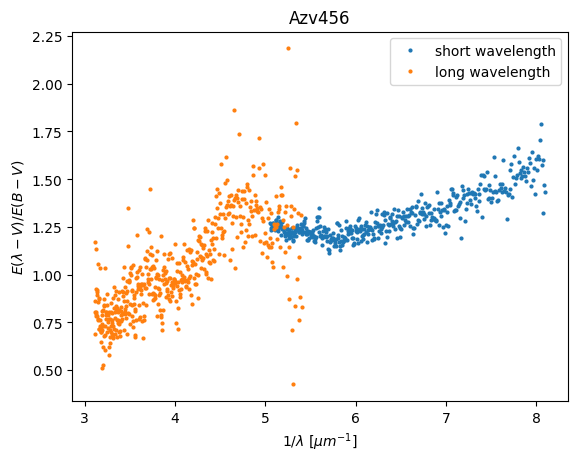

In [24]:
# How many points do we want to remove from either end of the data?
s_crop = 50
l_crop = -50

# Use helper function with cropped data
plt.figure()
s_inv_wav, s_ext = Extinction(wav_sw_dusty[s_crop:], flux_sw_dusty[s_crop:], flux_sw_nodust[s_crop:])
l_inv_wav, l_ext = Extinction(wav_lw_dusty[:l_crop], flux_lw_dusty[:l_crop], flux_lw_nodust[:l_crop])

# Add a title, axes labels, and a legend
plt.legend(['short wavelength', 'long wavelength'])
plt.xlabel(r'$1/\lambda$ $[\mu m^{-1}]$')
plt.ylabel(r'$E(\lambda-V)/E(B-V)$')
plt.title(target_dusty)
plt.show()

Much better.

This is the typical shape encountered for extinction curves corresponding to the Small Magellanic Cloud (SMC), as can be seen in [Gordon et al. (2003)](https://ui.adsabs.harvard.edu/abs/2003ApJ...594..279G/abstract). Note in particular the "bump" at the transition between long and short wavelengths. This is the mysterious 2175 $\mathring A$ bump; we don't fully understand its physical origin!

## Exercises

If you're interested in exploring further, go back to the beginning of this Notebook and select a new pair of stars (Gordon et al. have some examples!). Can you find a star that doesn't have the 2175 $\mathring A$ bump?

For convenience, you might want to add a more sophisticated method of error checking. Recall that above, we printed out the lengths of the data to ensure they matched. Can you think of a way to check for this automatically and adjust as needed?

## Additional Resources

For more information about the MAST archive and details about mission data: 

* <a href="https://mast.stsci.edu/api/v0/index.html">MAST API</a> <br>
* <a href="https://archive.stsci.edu/iue/">International Ultraviolet Explorer Page (MAST)</a> <br>
* <a href="https://archive.stsci.edu/iue/mdr_help.html">IUE Data Retrieval Help Page</a> 

For more information about extinction curves and their parametrization:


* <a href="https://ui.adsabs.harvard.edu/abs/2003ApJ...594..279G/abstract">A quantitative comparison of SMC, LMC and Milky Way UV to NIR extinction curves</a> <br>
* <a href="https://adsabs.harvard.edu/pdf/1990ApJS...72..163F">An analysis of the shapes of the ultraviolet extinction curves. III. An atlas of ultraviolet extinction curves</a> 



## About this Notebook

**Authors**: Clara Puerto Sánchez, Claire Murray, Thomas Dutkiewicz <br>
**Keyword(s)**: UV, reddening, extinction-curve <br>
**Last Updated**: Apr 2023 <br>

For support, please contact the Archive HelpDesk at archive@stsci.edu.
***
[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>